In [1]:
#pip install --upgrade scipy==1.11.4
#pip install --upgrade scikit-learn==1.3.0
#pip install --upgrade Bottleneck==1.3.7
#pip install --upgrade pandas==2.1.4
#pip install --upgrade threadpoolctl

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#from umap import UMAP
from scipy.stats import norm
from sklearn.datasets import make_multilabel_classification
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE, MDS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [3]:
file_path_features = '../Data/final_features.csv'
file_path_echonest = '../Data/final_echonest_features.csv'

In [4]:
features_df = pd.read_csv(file_path_features)
features_df.head()

,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,chroma_cens_kurtosis_10,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,0.619185,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,-0.804761,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


## EDA (in other Sheet)

# Echonest

In [5]:
# Read the data file with the specified column headers
echo_df = pd.read_csv(file_path_echonest)

echo_df.head()

/var/folders/88/rkxmpw3j3nlddb7phwjzbx6r0000gn/T/ipykernel_45695/1870594795.py:2: DtypeWarning: Columns (42,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  echo_df = pd.read_csv(file_path_echonest)


,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,album_tags,...,echonest_temporal_features_214,echonest_temporal_features_215,echonest_temporal_features_216,echonest_temporal_features_217,echonest_temporal_features_218,echonest_temporal_features_219,echonest_temporal_features_220,echonest_temporal_features_221,echonest_temporal_features_222,echonest_temporal_features_223
0,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749
1,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737
3,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809
4,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705


In [6]:
echo_df.shape

(13129, 819)

In [7]:
# Print the names of all columns
print(echo_df.columns[:800].tolist())

['album_comments', 'album_date_created', 'album_date_released', 'album_engineer', 'album_favorites', 'album_id', 'album_information', 'album_listens', 'album_producer', 'album_tags', 'album_title', 'album_tracks', 'album_type', 'artist_active_year_begin', 'artist_active_year_end', 'artist_associated_labels', 'artist_bio', 'artist_comments', 'artist_date_created', 'artist_favorites', 'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude', 'artist_members', 'artist_name', 'artist_related_projects', 'artist_tags', 'artist_website', 'artist_wikipedia_page', 'set_split', 'set_subset', 'track_bit_rate', 'track_comments', 'track_composer', 'track_date_created', 'track_date_recorded', 'track_duration', 'track_favorites', 'track_genre_top', 'track_genres', 'track_genres_all', 'track_information', 'track_interest', 'track_language_code', 'track_license', 'track_listens', 'track_lyricist', 'track_number', 'track_publisher', 'track_tags', 'track_title', 'chroma_cens_kurtosis_01', 'c

In [8]:
numeric_cols = echo_df.select_dtypes(include=['float64', 'int64']).columns

# Standardize only numeric columns
df_std = (echo_df[numeric_cols] - echo_df[numeric_cols].mean()) / echo_df[numeric_cols].std()

# Concatenate the standardized numeric columns with non-numeric columns
df_std = pd.concat([echo_df.drop(columns=numeric_cols), df_std], axis=1)

# Display the head of the resulting DataFrame
df_std.head()

,album_date_created,album_date_released,album_engineer,album_information,album_producer,album_tags,album_title,album_type,artist_active_year_begin,artist_active_year_end,...,echonest_temporal_features_214,echonest_temporal_features_215,echonest_temporal_features_216,echonest_temporal_features_217,echonest_temporal_features_218,echonest_temporal_features_219,echonest_temporal_features_220,echonest_temporal_features_221,echonest_temporal_features_222,echonest_temporal_features_223
0,2008-11-26 01:44:45,2009-01-05,NaN,<p></p>,NaN,[],AWOL - A Way Of Life,Album,2006-01-01,NaN,...,-0.015394,-0.196491,-0.541608,-0.746446,-0.039155,-0.406784,-0.101957,-0.101071,0.886169,0.549670
1,2008-11-26 01:44:45,2009-01-05,NaN,<p></p>,NaN,[],AWOL - A Way Of Life,Album,2006-01-01,NaN,...,0.224566,-0.092586,-0.360435,-0.411743,-0.023681,-0.402210,0.382355,0.383277,1.407026,0.827399
2,2008-11-26 01:44:45,2009-01-05,NaN,<p></p>,NaN,[],AWOL - A Way Of Life,Album,2006-01-01,NaN,...,-0.188678,0.038954,-0.372152,-0.209727,-0.029779,-0.767258,0.350895,0.352617,1.304665,0.965594
3,2008-11-26 01:45:08,2008-02-06,NaN,NaN,NaN,[],Constant Hitmaker,Album,NaN,NaN,...,-0.993261,0.536688,-0.182870,0.139607,-0.010956,1.124769,0.851655,0.849262,2.127522,1.527014
4,2008-11-26 01:44:45,2009-01-05,NaN,<p></p>,NaN,[],AWOL - A Way Of Life,Album,2006-01-01,NaN,...,0.300443,-0.418366,-0.530074,-0.666786,-0.004174,-0.377507,1.426003,1.426971,2.924606,2.713902


### Drop numerical Columns

In [9]:
columns_to_drop = ['album_comments', 'album_date_created', 'album_date_released',
                    'album_engineer', 'album_favorites', 'album_id',
                    'album_information', 'album_listens', 'album_producer',
                    'album_tags', 'album_title', 'album_tracks', 'album_type',
                    'artist_active_year_begin', 'artist_active_year_end',
                    'artist_associated_labels', 'artist_bio', 'artist_comments',
                    'artist_date_created', 'artist_favorites', 'artist_id',
                    'artist_latitude', 'artist_location', 'artist_longitude',
                    'artist_members', 'artist_name', 'artist_related_projects',
                    'artist_tags', 'artist_website', 'artist_wikipedia_page',
                    'set_split', 'set_subset', 'track_bit_rate', 'track_comments',
                    'track_composer', 'track_date_created', 'track_date_recorded',
                    'track_duration', 'track_favorites', 'track_genre_top',
                    'track_genres', 'track_genres_all', 'track_information',
                    'track_interest', 'track_language_code', 'track_license',
                    'track_listens', 'track_lyricist', 'track_number',
                    'track_publisher', 'track_tags', 'track_title']

df_std.drop(columns=columns_to_drop, inplace=True)

In [10]:
columns_to_drop = ['echonest_metadata_album_date',
                   'echonest_metadata_album_name',
                   'echonest_metadata_artist_latitude',
                   'echonest_metadata_artist_location',
                   'echonest_metadata_artist_longitude',
                   'echonest_metadata_artist_name',
                   'echonest_metadata_release',
                   'echonest_ranks_artist_discovery_rank',
                   'echonest_ranks_artist_familiarity_rank',
                   'echonest_ranks_artist_hotttnesss_rank',
                   'echonest_metadata_artist_location',
                   'echonest_metadata_artist_name',
                   'echonest_metadata_release'
                  ]

In [11]:
df_std.drop(columns=columns_to_drop, inplace=True)

In [12]:
df_std.head()

,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,chroma_cens_kurtosis_10,...,echonest_temporal_features_214,echonest_temporal_features_215,echonest_temporal_features_216,echonest_temporal_features_217,echonest_temporal_features_218,echonest_temporal_features_219,echonest_temporal_features_220,echonest_temporal_features_221,echonest_temporal_features_222,echonest_temporal_features_223
0,4.419124,3.603920,0.045437,1.117494,0.714768,0.196248,1.001587,0.620118,0.380048,0.509364,...,-0.015394,-0.196491,-0.541608,-0.746446,-0.039155,-0.406784,-0.101957,-0.101071,0.886169,0.549670
1,1.097430,0.483653,0.106345,1.941079,0.802157,-0.023927,0.919823,0.217405,0.020102,0.213077,...,0.224566,-0.092586,-0.360435,-0.411743,-0.023681,-0.402210,0.382355,0.383277,1.407026,0.827399
2,0.242853,-0.101476,-0.290230,0.542347,0.946592,0.362155,-0.711991,-0.269906,0.285052,0.385159,...,-0.188678,0.038954,-0.372152,-0.209727,-0.029779,-0.767258,0.350895,0.352617,1.304665,0.965594
3,2.235662,-0.250543,1.281298,-0.257556,0.656129,0.417972,1.207592,0.352795,0.216077,0.772459,...,-0.993261,0.536688,-0.182870,0.139607,-0.010956,1.124769,0.851655,0.849262,2.127522,1.527014
4,0.488217,0.423344,0.253906,1.059693,0.435244,-0.018902,0.800365,-0.084947,0.407854,0.549282,...,0.300443,-0.418366,-0.530074,-0.666786,-0.004174,-0.377507,1.426003,1.426971,2.924606,2.713902


In [13]:
print(df_std.select_dtypes(exclude=['float64', 'int64']).columns)

Index([], dtype='object')


### Drop Columns with missing Values

In [14]:
df_std.shape

(13129, 757)

In [15]:
columns_to_drop = ['chroma_stft_max_10',
                   'echonest_ranks_song_currency_rank',
                   'echonest_ranks_song_hotttnesss_rank'
                  ]

In [16]:
df_std.drop(columns=columns_to_drop, inplace=True)

# OPTIONAL: Select most important features

In [17]:
# For example: adjust this code to drop all the features with _02, _03, ... _09, _10
# Then we have only 60 cols and maybe can PCA down to 2 for isualization?
# Print the names of columns containing "-01"
# columns_with_01 = [col_name for col_name in df.columns if "_01" in col_name]
# print(columns_with_01)

## PCA on Echonest (60% Variance)

In [18]:
X = df_std.copy()

In [19]:
# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Step 3: Determine the number of components to keep for X% variance
keep_var = 0.6
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= keep_var) + 1

# Step 4: Retain only the selected components
X_reduced = X_pca[:, :num_components]
print(f"Optimal number of components for {keep_var * 100}% variance: {num_components}")

Optimal number of components for 60.0% variance: 35


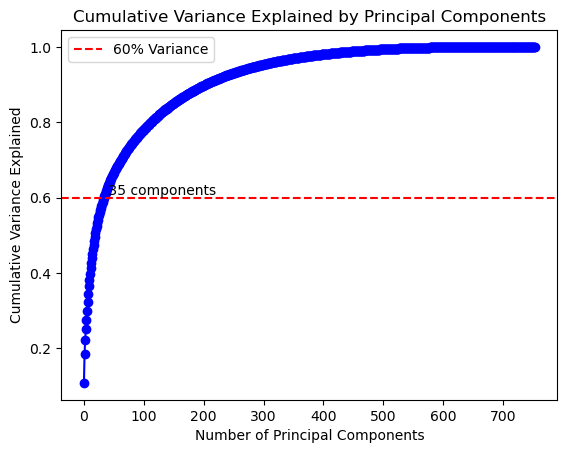

In [20]:
# Plot the cumulative variance explained
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-', color='b')

# Highlight the point where variance is X%
plt.axhline(y=keep_var, color='r', linestyle='--', label='60% Variance')

# Mark the number of components for X% variance
plt.scatter(num_components - 1, keep_var, color='r')
plt.text(num_components - 1, keep_var, f' {num_components} components', verticalalignment='bottom')

# Add labels and title
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')

# Show the legend
plt.legend()

# Show the plot
plt.show()

## KMEANS on PCA

In [21]:
print(num_components)

35


In [22]:
echo_df.shape[1]

819

In [23]:
num_components

35

In [24]:
X_reduced_df = pd.DataFrame(X_reduced)

In [25]:
# Initialize the KMeans clustering algorithm. The number of clusters is set to the number of 
# principal components identified by PCA to maintain consistency with dimensionality reduction.
km = KMeans(n_clusters=num_components, n_init=10, random_state=42)  

print(km)

# Fit the KMeans model to the PCA-reduced dataset.
km.fit(X_reduced)  

# Retrieve the cluster labels assigned to each data point in the dataset
labels = km.labels_

# Obtain the cluster centers from the KMeans model
cluster_centers = km.cluster_centers_

# Identify the unique cluster labels to know how many distinct clusters there are
labels_unique = np.unique(labels)

# Count the number of unique clusters generated by the KMeans algorithm.
n_clusters_ = len(labels_unique)

# Initialize an empty DataFrame for clusters 
if 'clusters' not in locals():
    clusters = pd.DataFrame()

# Create km_clusters DataFrame with correct column names after PCA reduction
component_names = [f"PC{i+1}" for i in range(num_components)]
km_clusters = pd.DataFrame(cluster_centers, columns=component_names)
km_clusters['cluster'] = ['KM{}'.format(l) for l in labels_unique]
km_clusters['method'] = 'KMeans'

# Concatenate with the clusters DataFrame
clusters = pd.concat([clusters, km_clusters])

cols = ['cluster'] + component_names + ['method']
clusters = clusters[cols]

KMeans(n_clusters=35, n_init=10, random_state=42)


## UMAP --> Does not work

In [26]:
# pip install numpy==1.26.4

## Kernel PCA (10 Components, adjust if needed)

In [27]:
from sklearn.decomposition import KernelPCA

# Create a KernelPCA instance
kpca = KernelPCA(kernel='rbf', n_components=10)  # You can choose different kernels like 'linear', 'poly', 'rbf', 'sigmoid', etc.

# Fit and transform the data
X_kpca = kpca.fit_transform(X)


In [28]:
X_kpca.shape

(13129, 10)

## KMeans on KPCA

# Function for K-MEANS

In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

def perform_kmeans_clustering(X_kpca, num_components):
    # Apply KMeans on the KPCA-reduced data
    km = KMeans(n_clusters=num_components, n_init=10, random_state=42)
    km.fit(X_kpca)
    labels = km.labels_

    # Extract the cluster centers from the KMeans model
    cluster_centers = km.cluster_centers_
    labels_unique = np.unique(labels)

    # Create DataFrame for cluster centers with component names
    component_names = [f"KPC{i+1}" for i in range(cluster_centers.shape[1])]
    km_clusters = pd.DataFrame(cluster_centers, columns=component_names)

    # Assign a unique identifier to each cluster in the DataFrame
    km_clusters['cluster'] = ['KM{}'.format(l) for l in labels_unique]
    km_clusters['method'] = 'KMeans'

    # Initialize a new DataFrame for clusters
    clusters = km_clusters.copy()

    # Ensure the columns list includes the dynamically adjusted component names
    cols = ['cluster'] + component_names + ['method']
    clusters = clusters[cols]

    # Create DataFrame with X_kpca and assigned clusters
    data_with_clusters = pd.DataFrame(X_kpca, columns=[f"KPC{i+1}" for i in range(X_kpca.shape[1])])
    data_with_clusters['cluster'] = labels

    return clusters, data_with_clusters

In [30]:
clusters_df, data_with_clusters_df = perform_kmeans_clustering(X_kpca, num_components)

In [31]:
clusters_df.shape

(35, 12)

In [32]:
data_with_clusters_df.shape

(13129, 11)

# Analyze Genres and Cluster

In [33]:
# Merge echo_df and km_clusters on their indices
merged_df = pd.merge(echo_df, data_with_clusters_df, left_index=True, right_index=True)

# Print the merged DataFrame
merged_df.head()

,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,album_tags,...,KPC2,KPC3,KPC4,KPC5,KPC6,KPC7,KPC8,KPC9,KPC10,cluster
0,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,0.011646,0.090662,0.155522,-0.003534,-0.128760,-0.020834,0.191787,-0.159285,-0.031608,27
1,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,0.012480,0.148660,0.137630,0.114396,0.106222,-0.091920,0.084016,0.127918,-0.055059,14
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,-0.060417,0.087673,0.147760,0.050386,0.073329,-0.061865,-0.006190,-0.025697,0.015588,26
3,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],...,0.221026,0.014392,0.112917,0.024613,0.021111,-0.033688,0.045455,0.077255,-0.050545,30
4,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,-0.179075,0.216366,0.155054,-0.045655,0.084080,-0.027790,-0.085348,-0.012602,-0.074475,10


In [34]:
# Filter out columns with numbers in the column name
columns_to_drop = [col for col in merged_df.columns if any(char.isdigit() for char in col)]

# Drop the filtered columns
merged_df = merged_df.drop(columns=columns_to_drop)

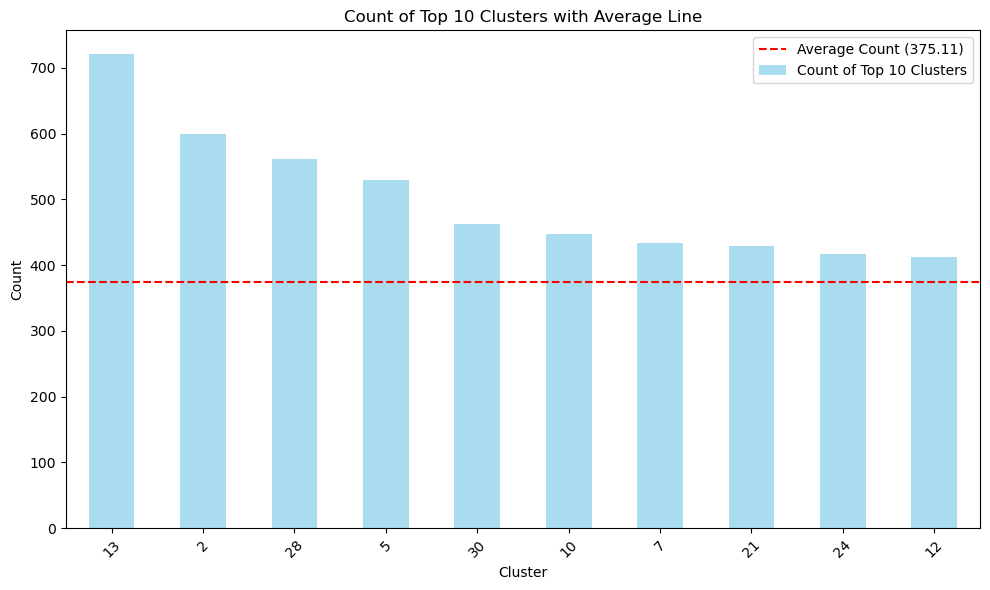

In [35]:
import matplotlib.pyplot as plt

# Group by the "cluster" column and count the rows
cluster_counts = merged_df.groupby('cluster').size()

# Get the top 10 clusters
top_10_clusters = cluster_counts.nlargest(10)

# Plot the counts of the top 10 clusters
plt.figure(figsize=(10, 6))
top_10_clusters.plot(kind='bar', color='skyblue', alpha=0.7, label='Count of Top 10 Clusters')

# Calculate the average count of all clusters
average_count = cluster_counts.mean()

# Plot the average line
plt.axhline(y=average_count, color='red', linestyle='--', label=f'Average Count ({average_count:.2f})')

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Top 10 Clusters with Average Line')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


# Analyzing one Cluster of interest

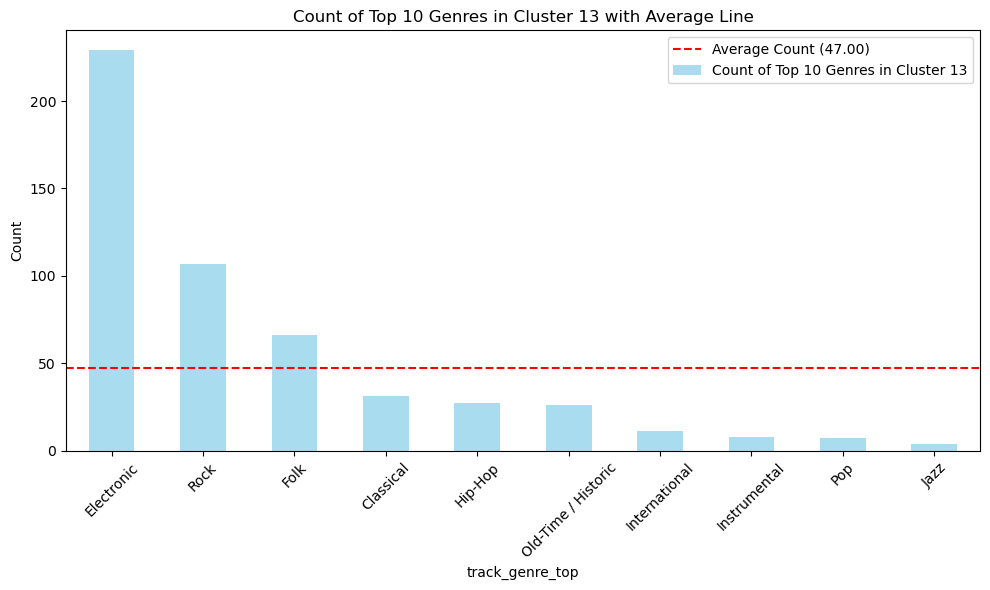

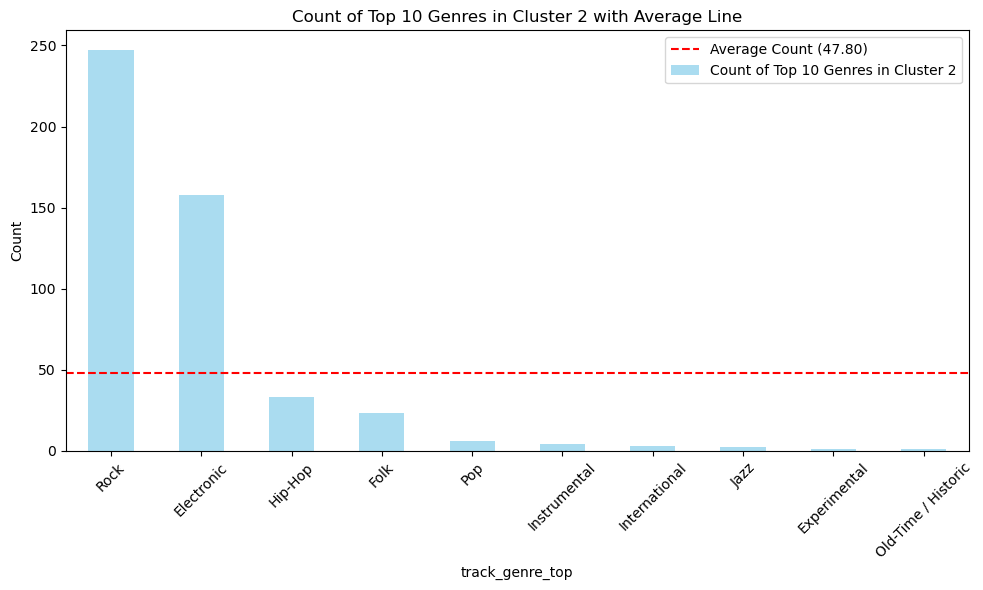

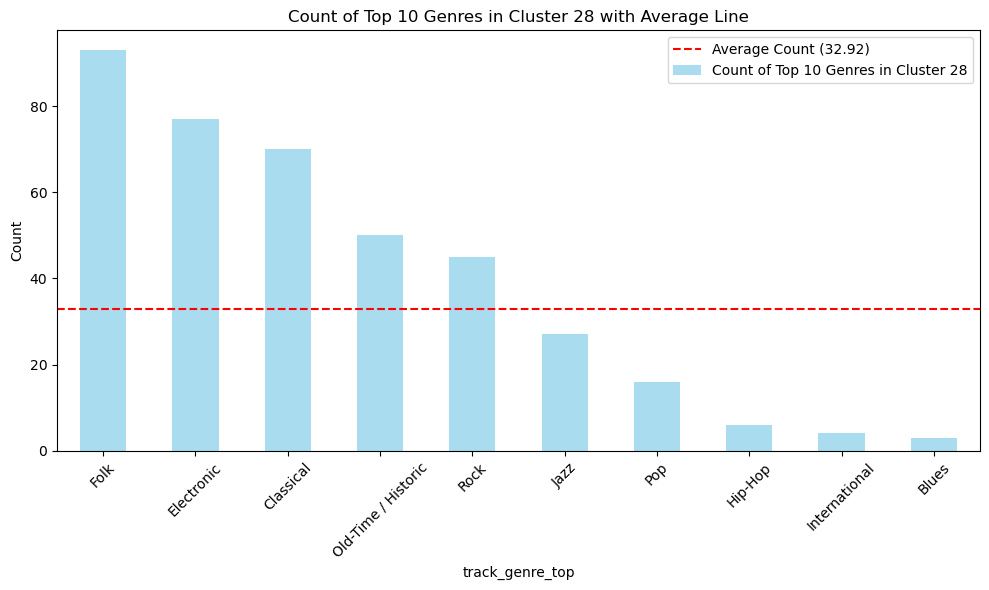

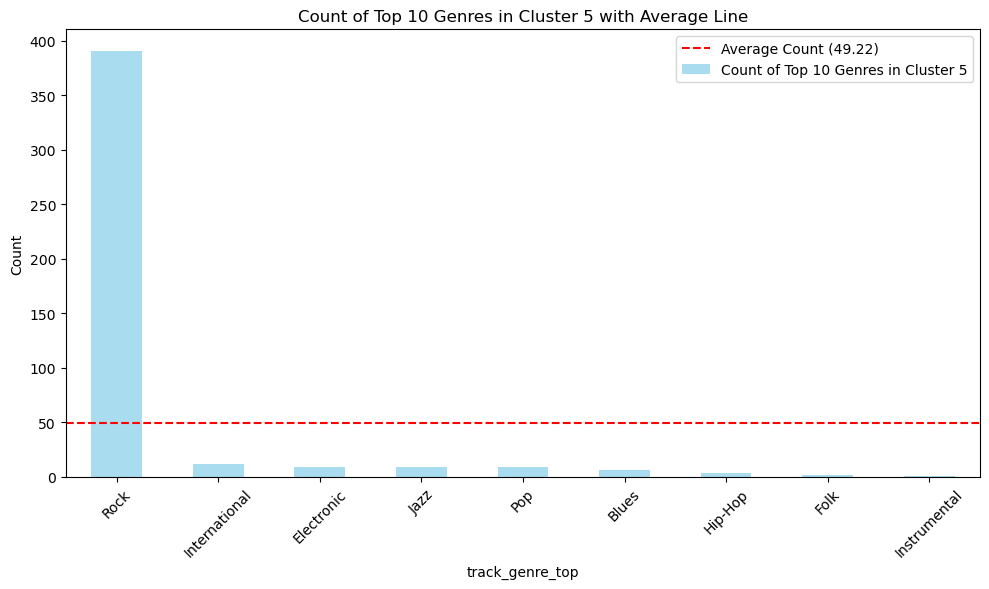

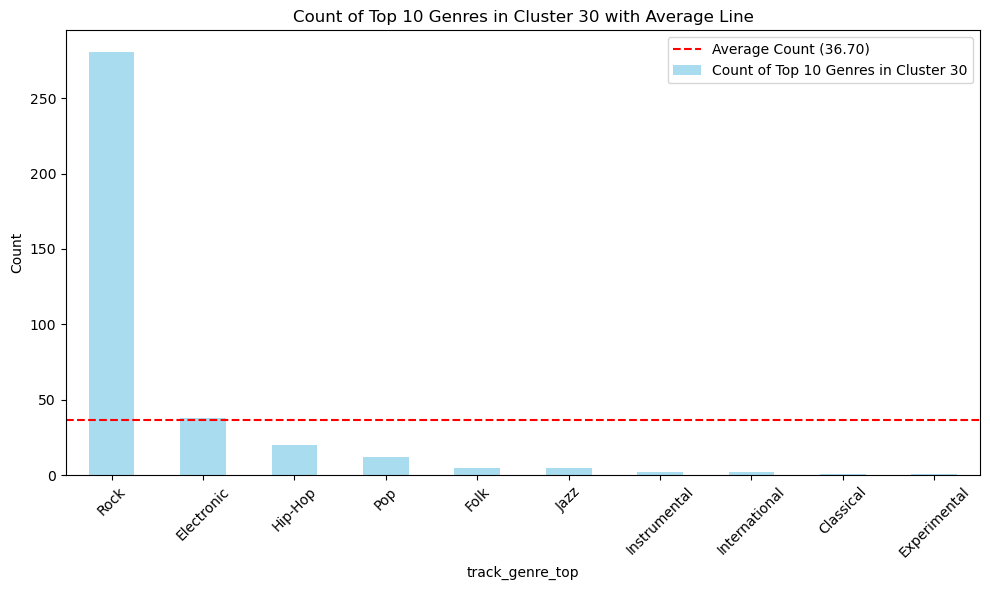

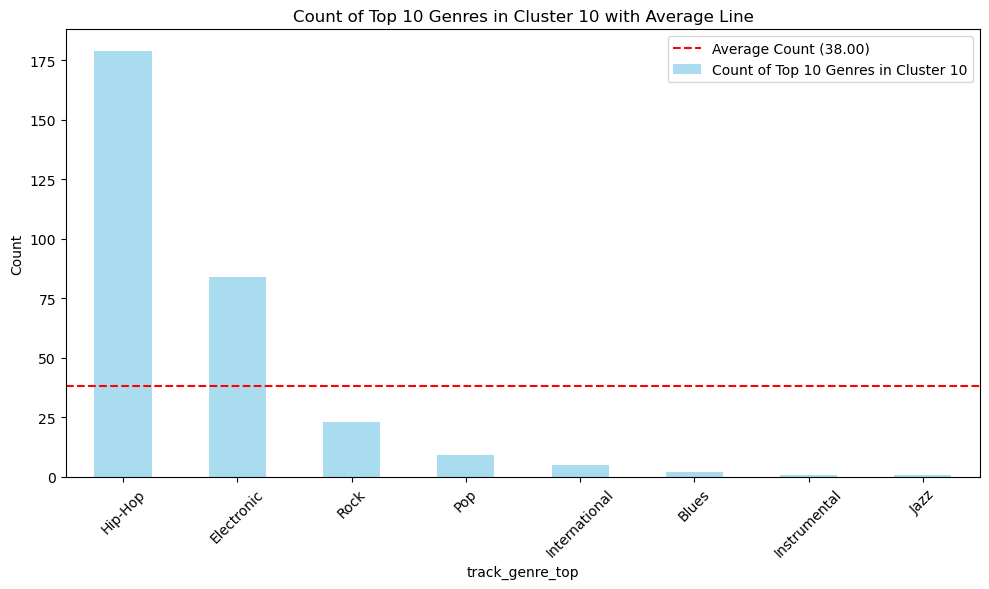

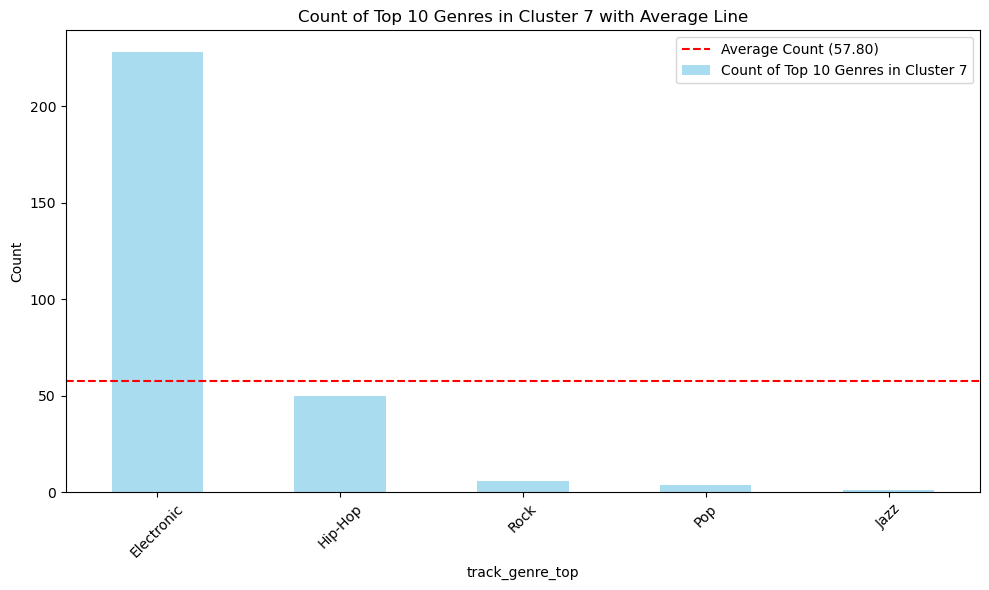

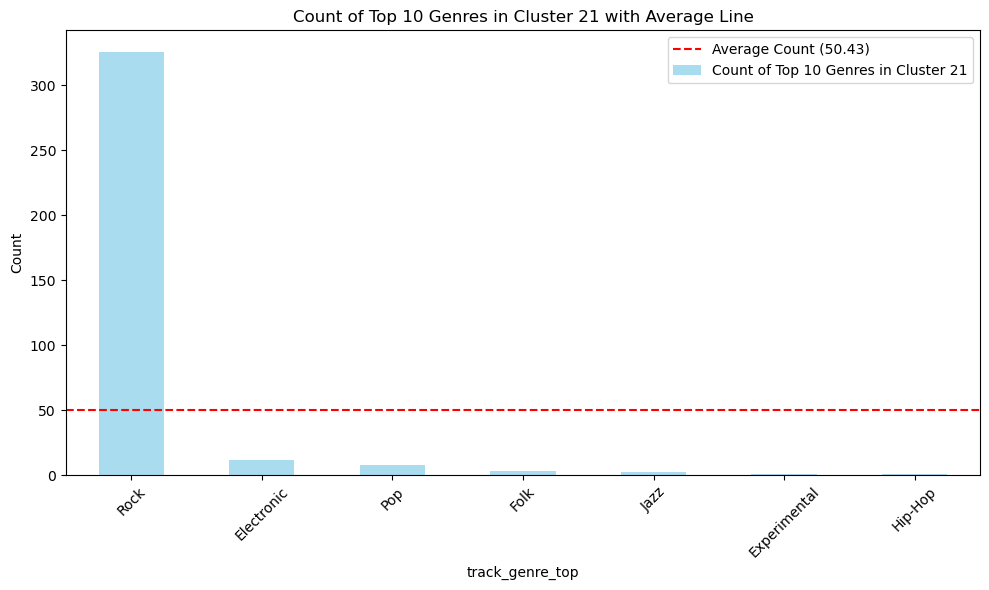

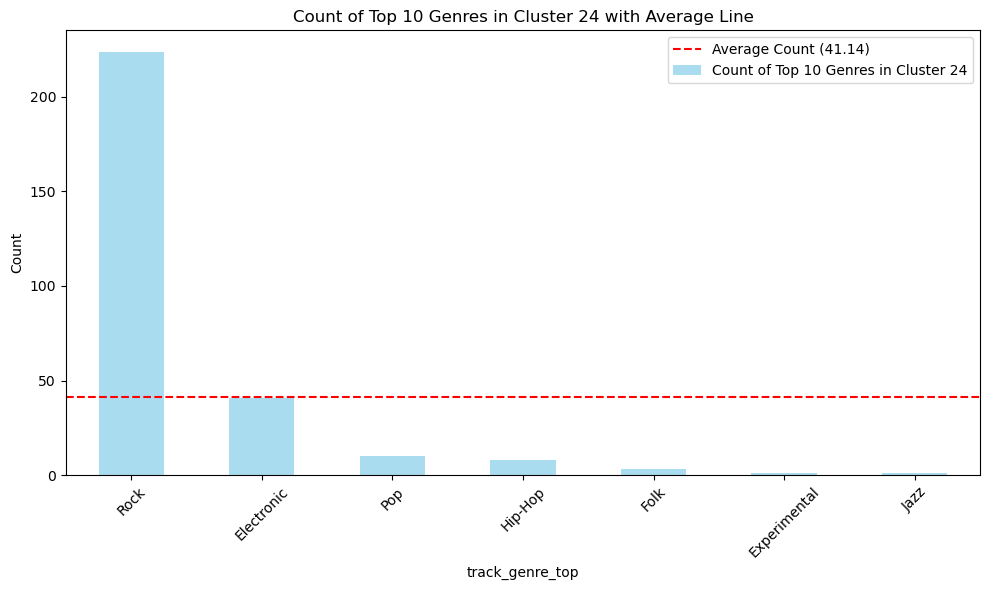

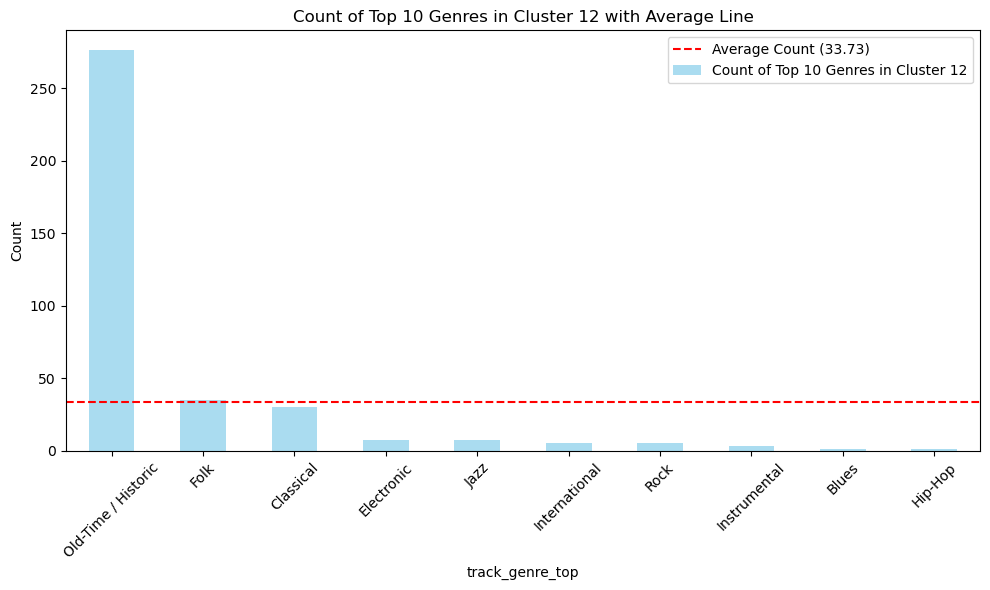

In [36]:
import matplotlib.pyplot as plt

# Group by the "cluster" column and count the rows
cluster_counts = merged_df.groupby('cluster').size()

# Get the top 10 clusters
top_10_clusters = cluster_counts.nlargest(10)

# Loop through the top 10 clusters
for cluster_num in top_10_clusters.index:
    # Filter rows belonging to the current cluster number
    cluster_data = merged_df[merged_df['cluster'] == cluster_num]

    # Group by the "track_genre_top" column and count the rows
    genre_counts = cluster_data.groupby('track_genre_top').size()

    # Get the top 10 genres
    top_10_genres = genre_counts.nlargest(10)

    # Plot the counts of the top 10 genres for the current cluster
    plt.figure(figsize=(10, 6))
    top_10_genres.plot(kind='bar', color='skyblue', alpha=0.7, label=f'Count of Top 10 Genres in Cluster {cluster_num}')

    # Calculate the average count of all genre groups for the current cluster
    average_count = genre_counts.mean()

    # Plot the average line for the current cluster
    plt.axhline(y=average_count, color='red', linestyle='--', label=f'Average Count ({average_count:.2f})')

    # Add labels and title
    plt.xlabel('track_genre_top')
    plt.ylabel('Count')
    plt.title(f'Count of Top 10 Genres in Cluster {cluster_num} with Average Line')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show plot for the current cluster
    plt.show()


## Analyze diversity in songs per album

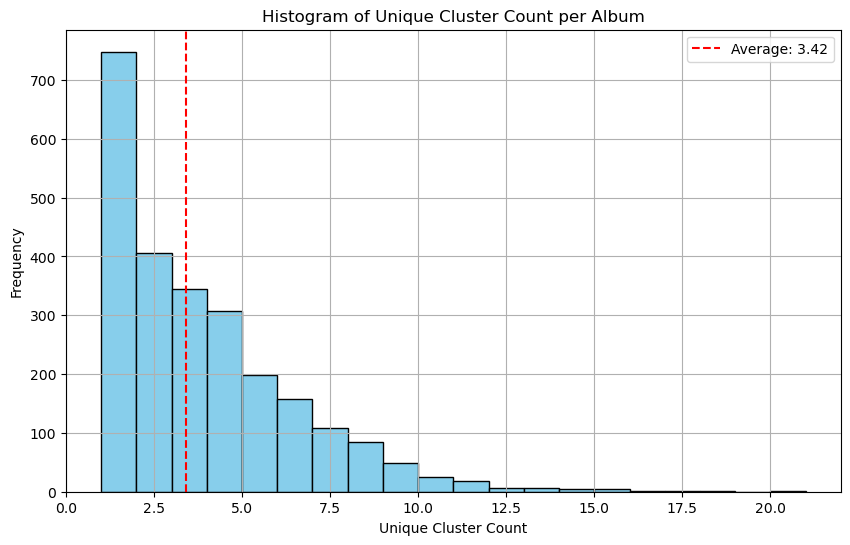

In [37]:
import matplotlib.pyplot as plt

# Group by "album_id" and calculate the average unique count of "cluster"
avg_unique_cluster_count = merged_df.groupby('album_id')['cluster'].nunique().mean()

# Plot the result in a histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df.groupby('album_id')['cluster'].nunique(), bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=avg_unique_cluster_count, color='red', linestyle='--', label=f'Average: {avg_unique_cluster_count:.2f}')
plt.title('Histogram of Unique Cluster Count per Album')
plt.xlabel('Unique Cluster Count')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


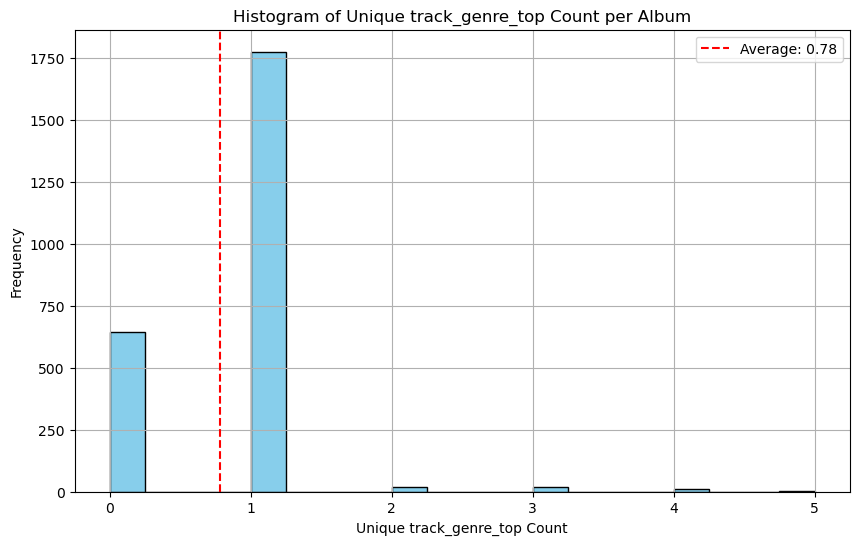

In [38]:
import matplotlib.pyplot as plt

# Group by "album_id" and calculate the average unique count of "cluster"
avg_unique_cluster_count = merged_df.groupby('album_id')['track_genre_top'].nunique().mean()

# Plot the result in a histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_df.groupby('album_id')['track_genre_top'].nunique(), bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=avg_unique_cluster_count, color='red', linestyle='--', label=f'Average: {avg_unique_cluster_count:.2f}')
plt.title('Histogram of Unique track_genre_top Count per Album')
plt.xlabel('Unique track_genre_top Count')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

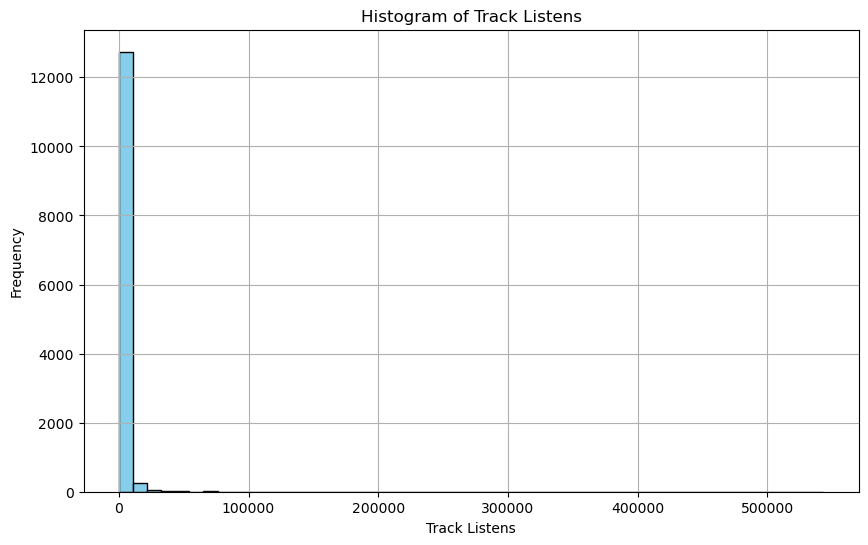

In [39]:
import matplotlib.pyplot as plt

# Plot histogram of track_listens
plt.figure(figsize=(10, 6))
plt.hist(merged_df['track_listens'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Track Listens')
plt.xlabel('Track Listens')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Popular Songs in Cluster

In [40]:
# Create a new column "hot_song" based on the condition
merged_df['hot_song'] = np.where(merged_df['track_listens'] > 10000, 'yes', 'no')

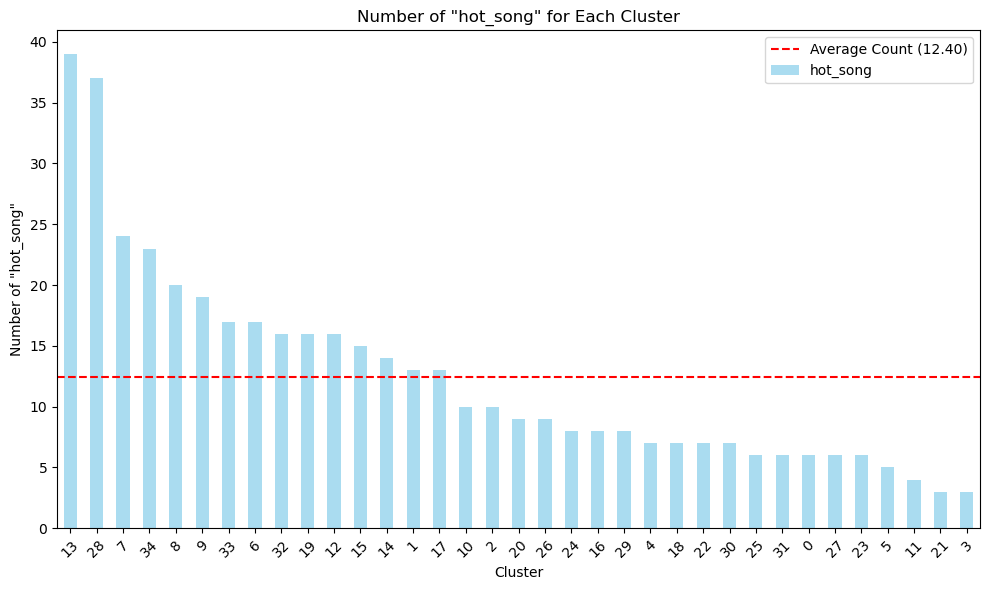

In [41]:
# Group by the "cluster" column and count the number of "yes" in "hot_song"
hot_song_counts = merged_df.groupby('cluster')['hot_song'].apply(lambda x: (x == 'yes').sum())

# Sort the clusters by the number of "hot_song" in descending order
hot_song_counts_sorted = hot_song_counts.sort_values(ascending=False)

# Calculate the average number of "hot_song" across all clusters
average_hot_song = hot_song_counts.mean()

# Plot bar chart of the clusters and the number of "hot_song" for each cluster
plt.figure(figsize=(10, 6))
hot_song_counts_sorted.plot(kind='bar', color='skyblue', alpha=0.7)
plt.axhline(y=average_hot_song, color='red', linestyle='--', label=f'Average Count ({average_hot_song:.2f})')
plt.title('Number of "hot_song" for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of "hot_song"')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Hierarchical Clustering for Top Clusters

In [42]:
clusters_df.shape

(35, 12)

In [43]:
threshold = 0.35

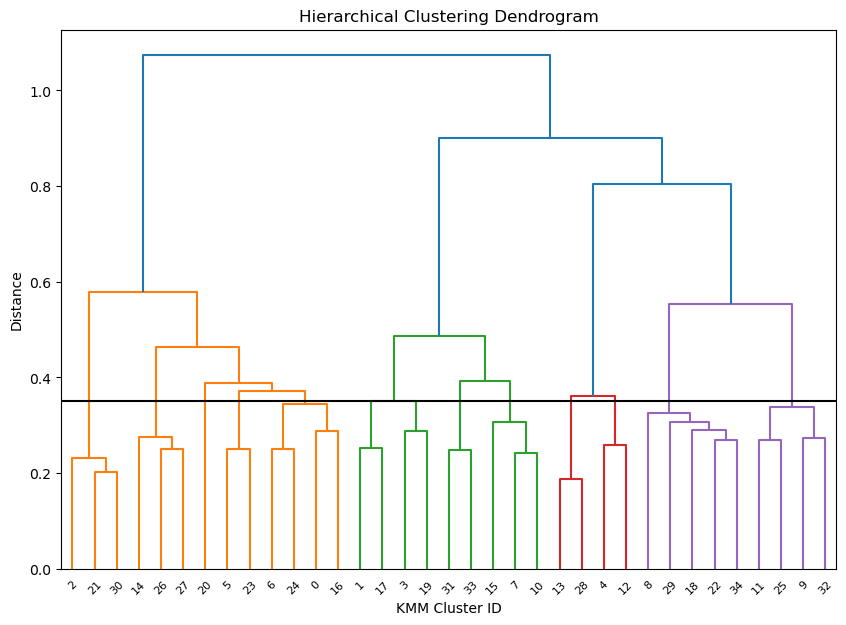

In [44]:
# Show the shape of the sampled DataFrame
df_numpy = clusters_df.iloc[:,1:-1].to_numpy()

# Perform Hierarchical Agglomerative Clustering
# We use the 'ward' method for linkage to minimize the variance of clusters being merged.
Z = linkage(df_numpy, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))  # Set the figure size
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('KMM Cluster ID')
plt.ylabel('Distance')
plt.axhline(y=threshold, c='k')
plt.show()

In [45]:
# Assign clusters using fcluster
h_clusters = fcluster(Z, threshold, criterion='distance')
len(h_clusters)

35

# Add Top H Cluster to Merged_Df

In [46]:
merged_df.head()

,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,album_tags,...,echonest_ranks_artist_hotttnesss_rank,echonest_ranks_song_currency_rank,echonest_ranks_song_hotttnesss_rank,echonest_social_features_artist_discovery,echonest_social_features_artist_familiarity,echonest_social_features_artist_hotttnesss,echonest_social_features_song_currency,echonest_social_features_song_hotttnesss,cluster,hot_song
0,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,27,no
1,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,14,no
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,26,no
3,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],...,397.0,115691.0,67609.0,0.557339,0.614272,0.798387,0.005158,0.354516,30,yes
4,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,10,no


In [47]:
# Define the cluster data
h_cluster_match = {
    'H_Cluster': [
        1, 2, 3, 4, 5,
        6, 7, 8, 9, 10,
        11, 12, 13
    ],
    'cluster': [
        [2, 21, 30], [14, 26, 27], [5, 23], [0, 6, 16, 24], [20],
        [1, 17], [3, 19], [31, 33], [7, 10, 15], [13, 28],
        [4, 12], [8, 18, 22, 29, 34], [9, 11, 25, 32]
    ]
}

# Create the DataFrame
h_cluster_match = pd.DataFrame(h_cluster_match)

# Explode the "cluster" column
h_cluster_match_exploded = h_cluster_match.explode('cluster')

# Reset the index
h_cluster_match_exploded.reset_index(drop=True, inplace=True)

h_cluster_match_exploded.head()


,H_Cluster,cluster
0,1,2
1,1,21
2,1,30
3,2,14
4,2,26


In [48]:
# Perform the join
final_df = merged_df.merge(h_cluster_match_exploded, on='cluster', how='inner')
print(final_df.shape)
final_df.head()

(13129, 80)


,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,album_tags,...,echonest_ranks_song_currency_rank,echonest_ranks_song_hotttnesss_rank,echonest_social_features_artist_discovery,echonest_social_features_artist_familiarity,echonest_social_features_artist_hotttnesss,echonest_social_features_song_currency,echonest_social_features_song_hotttnesss,cluster,hot_song,H_Cluster
0,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,27,no,2
1,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,14,no,2
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,26,no,2
3,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],...,115691.0,67609.0,0.557339,0.614272,0.798387,0.005158,0.354516,30,yes,1
4,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,10,no,9


# Hybrid Recommendation System (without Top Cluster)

In [58]:
import numpy as np

# Compute a score for each song based on a combination of similarity and popularity metrics
def compute_score(cluster, listens, favorites, comments, song_cluster, cluster_weights=(0.3, 0.4, 0.2, 0.1)):
    # Normalize popularity metrics to range [0, 1]
    listens_norm = listens / listens.max()
    favorites_norm = favorites / favorites.max()
    comments_norm = comments / comments.max()
    
    # Adjust cluster value based on whether it matches the input song's cluster
    cluster = cluster.apply(lambda x: 1 if x == song_cluster else 0)
    
    # Combine similarity and popularity metrics using weights
    score = (cluster * cluster_weights[0] +
             listens_norm * cluster_weights[1] +
             favorites_norm * cluster_weights[2] +
             comments_norm * cluster_weights[3])
    
    return score

def recommend_songs(similar_songs_df, song_index, num_recommendations=5):
    song_data = similar_songs_df.iloc[song_index]
    similar_songs = similar_songs_df.drop(song_index)
    
    # Get the cluster of the input song
    song_cluster = song_data['cluster']
    
    # Print information about the song that was listened to
    print("Information about the listened song:")
    print("Track Title:", song_data['track_title'])
    print("Cluster:", song_data['cluster'])
    print("Artist Name:", song_data['artist_name'])
    print("Album Title:", song_data['album_title'])
    print("Track Listens:", song_data['track_listens'])
    print("Track Favorites:", song_data['track_favorites'])
    print("Track Comments:", song_data['track_comments'])
    print("\n")    
    
    # Compute scores for all songs based on similarity and popularity metrics
    similar_songs['score'] = compute_score(similar_songs['cluster'], similar_songs['track_listens'],
                                           similar_songs['track_favorites'], similar_songs['track_comments'],
                                           song_cluster)
    
    # Get top recommendations sorted by score
    top_recommendations = similar_songs.sort_values(by='score', ascending=False).head(num_recommendations)
    
    # Select and print only the desired columns for the recommendations
    selected_columns = ['track_title', 'cluster', 'artist_name', 'album_title', 
                        'track_listens', 'track_favorites', 'track_comments']
    recommendations = top_recommendations[selected_columns]
    
    return recommendations

In [59]:
# Recommending songs similar to a given song at index 30
recommendations = recommend_songs(final_df, song_index=30, num_recommendations=10)
recommendations.head(10)


Information about the listened song:
Track Title: Ed Talk WNYC
Cluster: 13
Artist Name: Ed Askew
Album Title: What I Know
Track Listens: 125
Track Favorites: 1
Track Comments: 0




,track_title,cluster,artist_name,album_title,track_listens,track_favorites,track_comments
9448,Night Owl,1,Broke For Free,Directionless EP,543252,1482,37
11447,Snowing,13,Peter Rudenko,15 Etudes,177562,150,1
6765,Dream (instrumental),13,Chan Wai Fat,Children of Soul Mountain (original soundtrack),169318,180,1
9332,Sunset,13,Evgeny Grinko,Winter Sunshine EP,139908,338,0
6006,Fater Lee,28,Black Ant,Free Beats Sel. 3,433992,218,7
12028,Hachiko (The Faithtful Dog),28,The Kyoto Connection,Wake Up,374497,600,3
7037,"Original Rags (1900, piano roll)",13,Scott Joplin,Frog Legs: Ragtime Era Favorites,53643,146,0
9328,Winter Sunshine,13,Evgeny Grinko,Winter Sunshine EP,36903,163,0
11439,5:00 AM,13,Peter Rudenko,15 Etudes,49136,65,1
6012,5 Piece,13,Black Ant,Free Beats Sel. 3,40125,59,0


# Hybrid Recommendation System: Cluster,Top-H Cluster and Popularity

In [51]:
final_df['H_Cluster'] = final_df['H_Cluster'].astype(object)
final_df.head()

,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,album_tags,...,echonest_ranks_song_currency_rank,echonest_ranks_song_hotttnesss_rank,echonest_social_features_artist_discovery,echonest_social_features_artist_familiarity,echonest_social_features_artist_hotttnesss,echonest_social_features_song_currency,echonest_social_features_song_hotttnesss,cluster,hot_song,H_Cluster
0,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,27,no,2
1,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,14,no,2
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,26,no,2
3,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],...,115691.0,67609.0,0.557339,0.614272,0.798387,0.005158,0.354516,30,yes,1
4,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],...,NaN,NaN,0.388990,0.386740,0.406370,0.000000,0.000000,10,no,9


In [52]:
import numpy as np

def compute_score(cluster, h_cluster, listens, favorites, comments,
                  song_cluster, song_cluster_H, cluster_weights=(0.15, 0.15, 0.3, 0.3, 0.1)):
    # Normalize popularity metrics to range [0, 1]
    listens_norm = listens / listens.max()
    favorites_norm = favorites / favorites.max()
    comments_norm = comments / comments.max()
    
    # Adjust cluster value based on whether it matches the input song's cluster
    cluster = cluster.apply(lambda x: 0.3 if x == song_cluster else 0)
    h_cluster = h_cluster.apply(lambda x: 0.7 if x == song_cluster_H else 0)
    
    # Combine similarity and popularity metrics using weights
    score = (cluster * cluster_weights[0] +
             h_cluster * cluster_weights[1] +
             listens_norm * cluster_weights[2] +
             favorites_norm * cluster_weights[3] +
             comments_norm * cluster_weights[4])
    
    return score


def recommend_songs(similar_songs_df, song_index, num_recommendations=5):
    song_data = similar_songs_df.iloc[song_index]
    similar_songs = similar_songs_df.drop(song_index)
    
    # Get the cluster of the input song
    song_cluster = song_data['cluster']
    song_cluster_H = song_data['H_Cluster']  # Define song_cluster_H
    
    # Print information about the song that was listened to
    print("Information about the listened song:")
    print("Track Title:", song_data['track_title'])
    print("Cluster:", song_data['cluster'])
    print("Top Cluster:", song_cluster_H)
    print("Artist Name:", song_data['artist_name'])
    print("Album Title:", song_data['album_title'])
    print("Track Listens:", song_data['track_listens'])
    print("Track Favorites:", song_data['track_favorites'])
    print("Track Comments:", song_data['track_comments'])
    print("\n")    
    
    # Compute scores for all songs based on similarity and popularity metrics
    similar_songs['score'] = compute_score(similar_songs['cluster'], similar_songs['H_Cluster'],
                                           similar_songs['track_listens'],
                                           similar_songs['track_favorites'], similar_songs['track_comments'],
                                           song_cluster, song_cluster_H)  # Pass song_cluster_H
    
    # Get top recommendations sorted by score
    top_recommendations = similar_songs.sort_values(by='score', ascending=False).head(num_recommendations)
    
    # Select and print only the desired columns for the recommendations
    selected_columns = ['track_title', 'H_Cluster','cluster', 'artist_name', 'album_title', 
                        'track_listens', 'track_favorites', 'track_comments']
    recommendations = top_recommendations[selected_columns]
    
    return recommendations


In [61]:
# Recommending songs similar to a given song at index 30 which is from Cluster 13 9332
recommendations = recommend_songs(final_df, song_index=30, num_recommendations=10)
recommendations.head(10)


Information about the listened song:
Track Title: Ed Talk WNYC
Cluster: 13
Artist Name: Ed Askew
Album Title: What I Know
Track Listens: 125
Track Favorites: 1
Track Comments: 0




,track_title,cluster,artist_name,album_title,track_listens,track_favorites,track_comments
9448,Night Owl,1,Broke For Free,Directionless EP,543252,1482,37
11447,Snowing,13,Peter Rudenko,15 Etudes,177562,150,1
6765,Dream (instrumental),13,Chan Wai Fat,Children of Soul Mountain (original soundtrack),169318,180,1
9332,Sunset,13,Evgeny Grinko,Winter Sunshine EP,139908,338,0
6006,Fater Lee,28,Black Ant,Free Beats Sel. 3,433992,218,7
12028,Hachiko (The Faithtful Dog),28,The Kyoto Connection,Wake Up,374497,600,3
7037,"Original Rags (1900, piano roll)",13,Scott Joplin,Frog Legs: Ragtime Era Favorites,53643,146,0
9328,Winter Sunshine,13,Evgeny Grinko,Winter Sunshine EP,36903,163,0
11439,5:00 AM,13,Peter Rudenko,15 Etudes,49136,65,1
6012,5 Piece,13,Black Ant,Free Beats Sel. 3,40125,59,0
